In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\clustering\ncr_ride_bookings.csv")
pd.set_option('display.max_columns', None)
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,NaN,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,NaN,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,NaN,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [3]:
df.columns = df.columns.str.strip()

In [4]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

In [5]:
for col in ['Booking ID', 'Customer ID']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('"', '').str.strip() 

In [6]:
numeric_columns = ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 
                  'Cancelled Rides by Driver', 'Incomplete Rides', 
                  'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df['Date'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.day_name()
df['Month'] = df['DateTime'].dt.month_name()
df['Year'] = df['DateTime'].dt.year

In [8]:
df.shape

(150000, 26)

In [9]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DateTime,Hour,DayOfWeek,Month,Year
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,12,Saturday,March,2024
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39,18,Friday,November,2024
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,8,Friday,August,2024
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,17,Monday,October,2024
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,22,Monday,September,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,CNR6500631,Completed,CID4337371,Go Mini,MG Road,Ghitorni,10.2,44.4,NaN,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet,2024-11-11 19:34:01,19,Monday,November,2024
149996,2024-11-24,15:55:09,CNR2468611,Completed,CID2325623,Go Mini,Golf Course Road,Akshardham,5.1,30.8,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI,2024-11-24 15:55:09,15,Sunday,November,2024
149997,2024-09-18,10:55:15,CNR6358306,Completed,CID9925486,Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,NaN,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash,2024-09-18 10:55:15,10,Wednesday,September,2024
149998,2024-10-05,07:53:34,CNR3030099,Completed,CID9415487,Auto,Ghaziabad,Saidulajab,6.9,39.6,NaN,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI,2024-10-05 07:53:34,7,Saturday,October,2024


In [10]:
total_rides = len(df)
date_range = f"{df['DateTime'].min().strftime('%Y-%m-%d')} to {df['DateTime'].max().strftime('%Y-%m-%d')}"

In [11]:
print(f"Total Rides:                        {total_rides}")
print(f"Date Range:                         {date_range}")
print(f"Distinct Vehicle Type Count:        {df['Vehicle Type'].nunique()}")
print(f"Distinct Number of Customers:       {df['Customer ID'].nunique()}")

Total Rides:                        150000
Date Range:                         2024-01-01 to 2024-12-30
Distinct Vehicle Type Count:        7
Distinct Number of Customers:       148788


##### Reservation Status Distribution

In [12]:
status_counts = df['Booking Status'].value_counts()
for status, count in status_counts.items():
    percentage = (count / total_rides) * 100
    print(f" {status}: {count:,} ({percentage:.1f}%)")

 Completed: 93,000 (62.0%)
 Cancelled by Driver: 27,000 (18.0%)
 No Driver Found: 10,500 (7.0%)
 Cancelled by Customer: 10,500 (7.0%)
 Incomplete: 9,000 (6.0%)


##### Vehicle Type Distribution

In [13]:
vehicles_counts = df['Vehicle Type'].value_counts().head(10)
for vehicle , count in vehicles_counts.items():
    percentage = (count / total_rides) * 100 
    print(f"{vehicle} --> {count:,}  ({percentage:.1f}%)")

Auto --> 37,419  (24.9%)
Go Mini --> 29,806  (19.9%)
Go Sedan --> 27,141  (18.1%)
Bike --> 22,517  (15.0%)
Premier Sedan --> 18,111  (12.1%)
eBike --> 10,557  (7.0%)
Uber XL --> 4,449  (3.0%)


##### Reservation Status Analysis

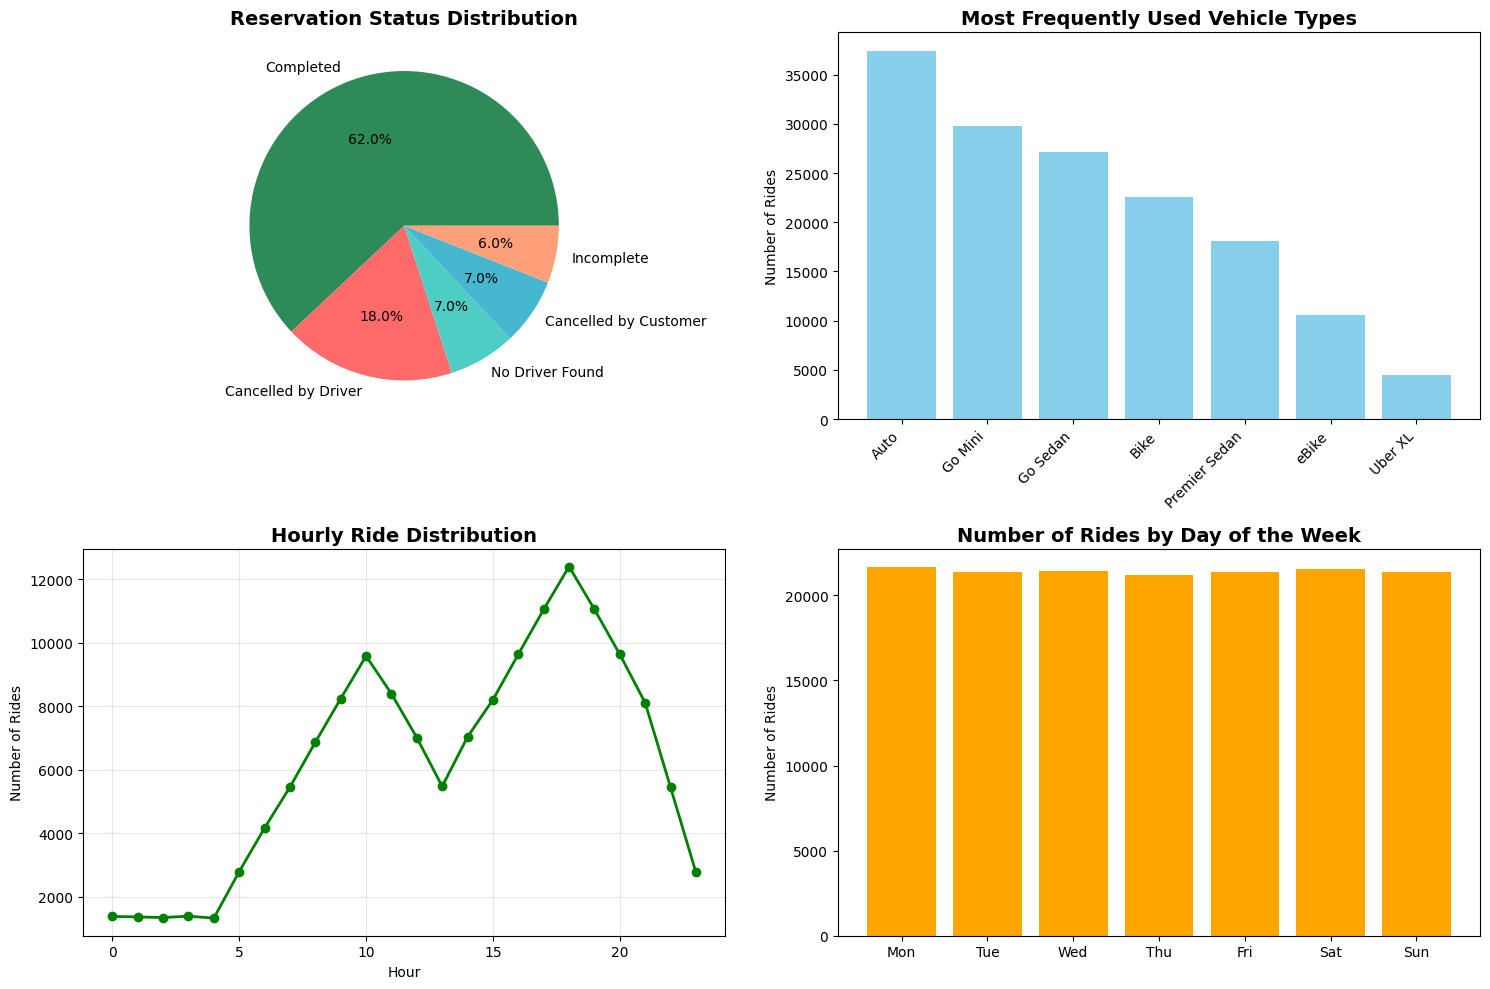

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
status_counts = df['Booking Status'].value_counts()
colors = ['#2E8B57', '#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=colors[:len(status_counts)])
plt.title('Reservation Status Distribution', fontsize = 14, fontweight = 'bold')

plt.subplot(2,2,2)
vehicle_counts = df['Vehicle Type'].value_counts()
plt.bar(range(len(vehicle_counts)), vehicle_counts.values, color='skyblue')
plt.xticks(range(len(vehicle_counts)), vehicle_counts.index, rotation = 45, ha='right')
plt.title('Most Frequently Used Vehicle Types', fontsize = 14, fontweight = 'bold')
plt.ylabel('Number of Rides')

plt.subplot(2,2,3)
hourly_riders = df['Hour'].value_counts().sort_index()
plt.plot(hourly_riders.index, hourly_riders.values, marker = 'o', linewidth = 2, color = 'green')
plt.title('Hourly Ride Distribution', fontsize = 14, fontweight = 'bold')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.grid(True, alpha = 0.3)

plt.subplot(2, 2, 4)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayOfWeek'].value_counts().reindex(day_order)
plt.bar(range(len(day_counts)), day_counts.values, color = 'orange')
plt.xticks(range(len(day_counts)), [day[:3] for day in day_counts.index])
plt.title('Number of Rides by Day of the Week', fontsize = 14, fontweight = 'bold')
plt.ylabel('Number of Rides')

plt.tight_layout()
plt.show()

##### Finance Analysis

In [15]:
completed_rides = df[df['Booking Status'] == 'Completed']
if not completed_rides.empty and 'Booking Value' in completed_rides.columns:
    booking_values = completed_rides['Booking Value'].dropna()

    if len(booking_values) > 0:
        print(f"Total Revenue:           {booking_values.sum():,.2f}")
        print(f"Average Ride Value:      {booking_values.mean():.2f}")
        print(f"Highest Ride Value:      {booking_values.max():.2f}")
        print(f"Lowest Ride Value:       {booking_values.min():.2f}")
        print(f"Median Ride Value:       {booking_values.median():.2f}")


Total Revenue:           47,260,574.00
Average Ride Value:      508.18
Highest Ride Value:      4277.00
Lowest Ride Value:       50.00
Median Ride Value:       414.00


In [16]:
payment_counts = df['Payment Method'].value_counts()
for method, count in payment_counts.items():
    if pd.notna(method):
        percentage = (count / len(df[df['Payment Method'].notna()])) * 100
        print(f' {method} --> {count:,} ({percentage:.1f}%)')

 UPI --> 45,909 (45.0%)
 Cash --> 25,367 (24.9%)
 Uber Wallet --> 12,276 (12.0%)
 Credit Card --> 10,209 (10.0%)
 Debit Card --> 8,239 (8.1%)


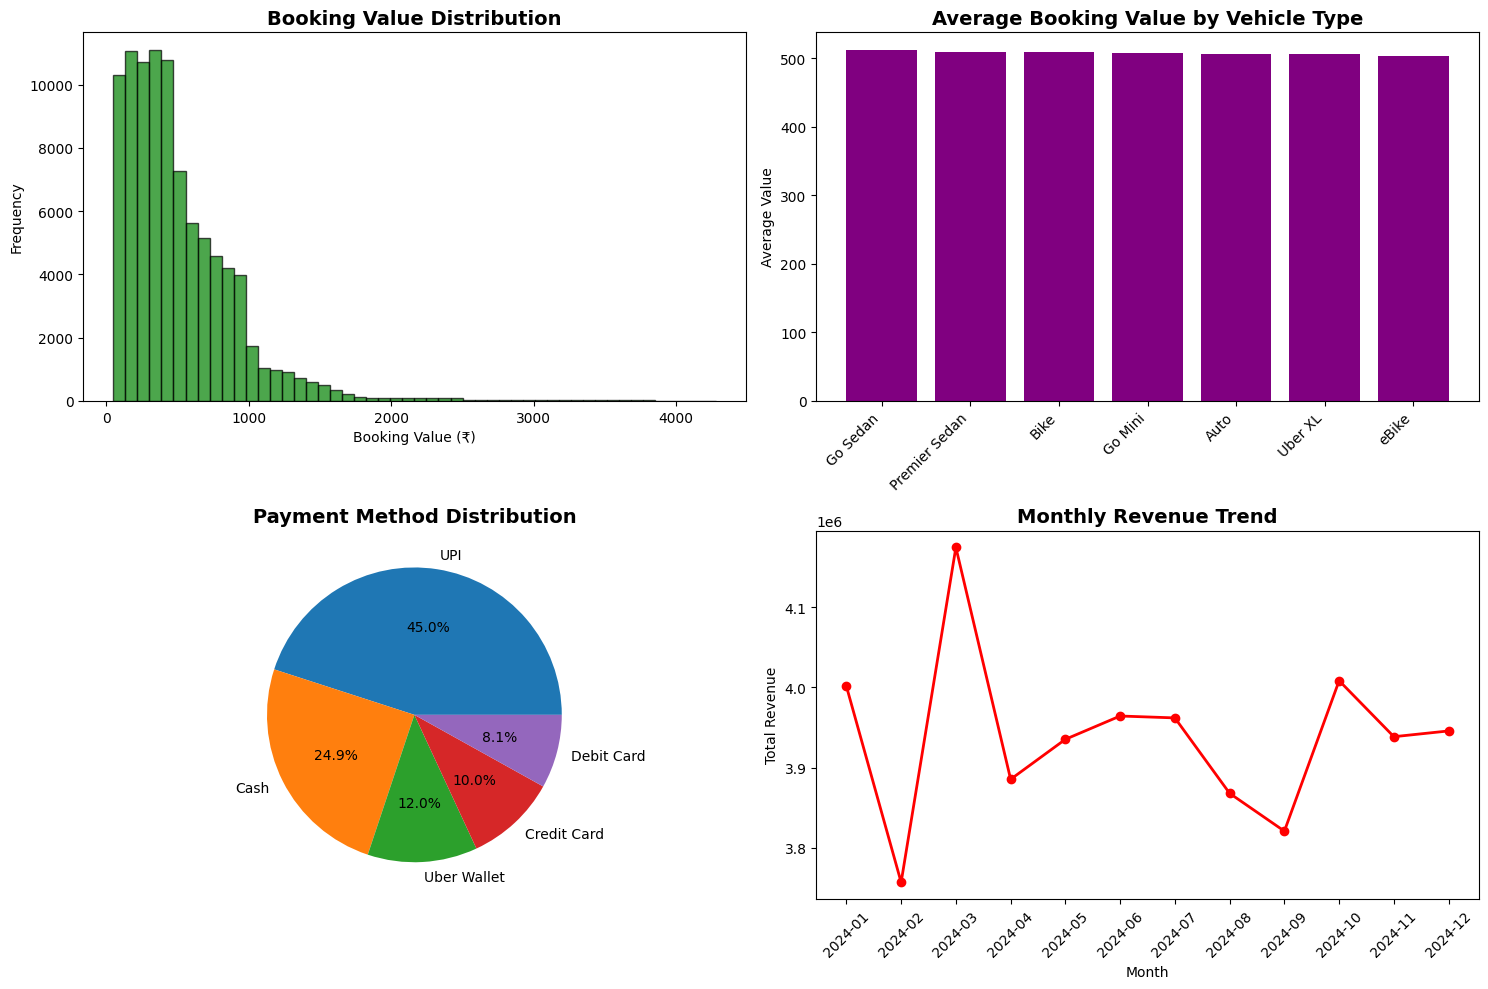

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)

plt.hist(booking_values, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('Booking Value Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Booking Value (₹)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)

avg_value_by_vehicle = completed_rides.groupby('Vehicle Type')['Booking Value'].mean().sort_values(ascending=False).head(8)
plt.bar(range(len(avg_value_by_vehicle)), avg_value_by_vehicle.values, color='purple')
plt.xticks(range(len(avg_value_by_vehicle)), avg_value_by_vehicle.index, rotation=45, ha='right')
plt.title('Average Booking Value by Vehicle Type', fontsize=14, fontweight='bold')
plt.ylabel('Average Value')

plt.subplot(2, 2, 3)

payment_counts = df['Payment Method'].value_counts()
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Payment Method Distribution', fontsize=14, fontweight='bold')

plt.subplot(2, 2, 4)

monthly_revenue = completed_rides.groupby([completed_rides['DateTime'].dt.year, completed_rides['DateTime'].dt.month])['Booking Value'].sum()
months = [f"{year}-{month:02d}" for year, month in monthly_revenue.index]
plt.plot(range(len(monthly_revenue)), monthly_revenue.values, marker='o', linewidth=2, color='red')
plt.title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(0, len(months), max(1, len(months)//10)), [months[i] for i in range(0, len(months), max(1, len(months)//10))], rotation=45)

plt.tight_layout()
plt.show()


##### Customer and Driver Analysis

In [18]:
customer_stats = df.groupby('Customer ID').agg({
    'Booking ID': 'count',
    'Booking Value': 'sum',
    'Booking Status': lambda x: (x == 'Complete').sum()}).rename(
        columns={'Booking ID': 'Total_Rides', 'Booking Value': 'Total_Spent', 'Booking Status': 'Complete_Rides'})

In [19]:
print(f"Active Customers: {len(customer_stats):,}")
print(f"Average Rides per Customer: {customer_stats['Total_Rides'].mean():.2f}")

Active Customers: 148,788
Average Rides per Customer: 1.01


In [20]:
top_customers = customer_stats.nlargest(10, 'Total_Rides')
for i, (customer_id, stats) in enumerate(top_customers.iterrows(), 1):
    print(f"{i}. {customer_id}: {stats['Total_Rides']} ride")

1. CID4523979: 3.0 ride
2. CID5481002: 3.0 ride
3. CID6468528: 3.0 ride
4. CID6715450: 3.0 ride
5. CID7828101: 3.0 ride
6. CID8727691: 3.0 ride
7. CID1008198: 2.0 ride
8. CID1008784: 2.0 ride
9. CID1031312: 2.0 ride
10. CID1031683: 2.0 ride


In [21]:
driver_ratings = df['Driver Ratings'].dropna()
customer_ratings = df['Customer Rating'].dropna()

if len(driver_ratings) > 0:
    print(f" Average Driver Rating:         {driver_ratings.mean():.2f}/5.0")
    print(f" Average Customer Ratings:      {customer_ratings.mean():.2f}/5.0")

 Average Driver Rating:         4.23/5.0
 Average Customer Ratings:      4.40/5.0


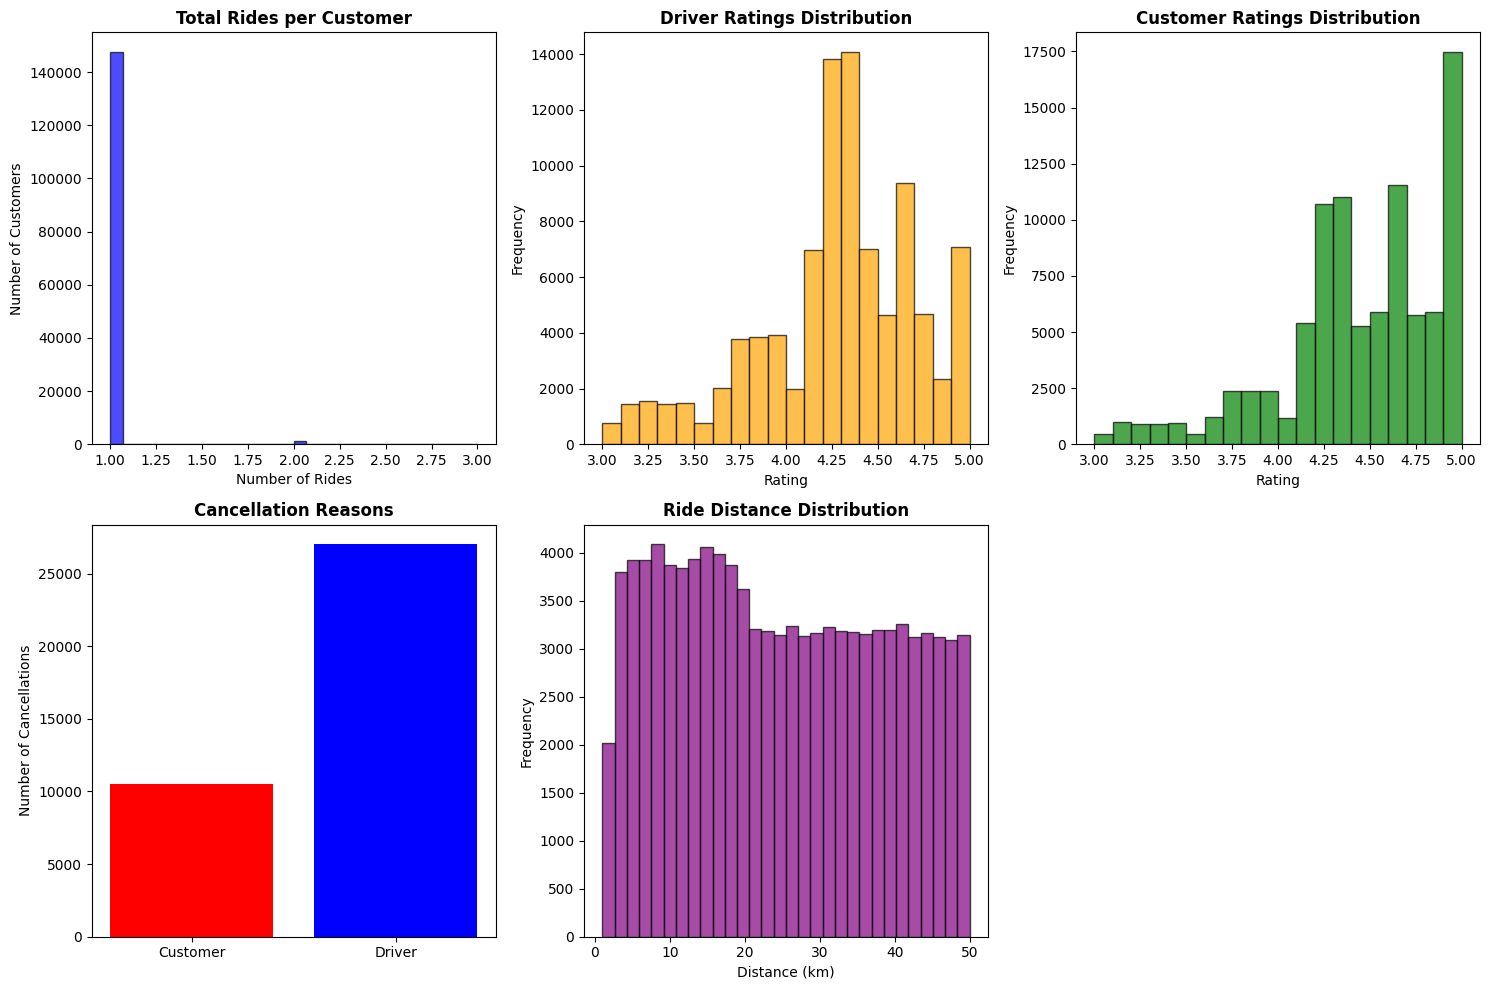

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
ride_counts = customer_stats['Total_Rides']
plt.hist(ride_counts, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Total Rides per Customer', fontsize=12, fontweight='bold')
plt.xlabel('Number of Rides')
plt.ylabel('Number of Customers')

plt.subplot(2, 3, 2)
plt.hist(driver_ratings, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Driver Ratings Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(customer_ratings, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.title('Customer Ratings Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
cancellation_data = []
customer_cancellations = df['Cancelled Rides by Customer'].sum()
cancellation_data.append(('Customer', customer_cancellations))

driver_cancellations = df['Cancelled Rides by Driver'].sum()
cancellation_data.append(('Driver', driver_cancellations))

labels, values = zip(*cancellation_data)
plt.bar(labels, values, color=['red', 'blue'])
plt.title('Cancellation Reasons', fontsize=12, fontweight='bold')
plt.ylabel('Number of Cancellations')

distances = df['Ride Distance'].dropna()
plt.subplot(2, 3, 5)
plt.hist(distances, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Ride Distance Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [23]:
print(f"Average Ride Distance:      {distances.mean():.2f} km")
print(f"Shortest Ride:              {distances.min():.2f} km")
print(f"Longest Ride:               {distances.max():.2f} km")

Average Ride Distance:      24.64 km
Shortest Ride:              1.00 km
Longest Ride:               50.00 km


##### Popular Locations

In [24]:
pickup_locations = df['Pickup Location'].value_counts().head(10)
for i, (location, count) in enumerate(pickup_locations.items(), 1):
    print(f" {i}. {location}: {count:,} rides")

 1. Khandsa: 949 rides
 2. Barakhamba Road: 946 rides
 3. Saket: 931 rides
 4. Badarpur: 921 rides
 5. Pragati Maidan: 920 rides
 6. Madipur: 919 rides
 7. AIIMS: 918 rides
 8. Mehrauli: 915 rides
 9. Dwarka Sector 21: 914 rides
 10. Pataudi Chowk: 907 rides


In [25]:
drop_locations = df['Drop Location'].value_counts().head(10)
for i , (location, count) in enumerate(drop_locations.items(), 1):
    print(f" {i}. {location}: {count:,} rides")

 1. Ashram: 936 rides
 2. Basai Dhankot: 917 rides
 3. Lok Kalyan Marg: 916 rides
 4. Narsinghpur: 913 rides
 5. Cyber Hub: 912 rides
 6. Kalkaji: 912 rides
 7. Kashmere Gate ISBT: 909 rides
 8. Udyog Vihar: 906 rides
 9. Lajpat Nagar: 904 rides
 10. Madipur: 902 rides


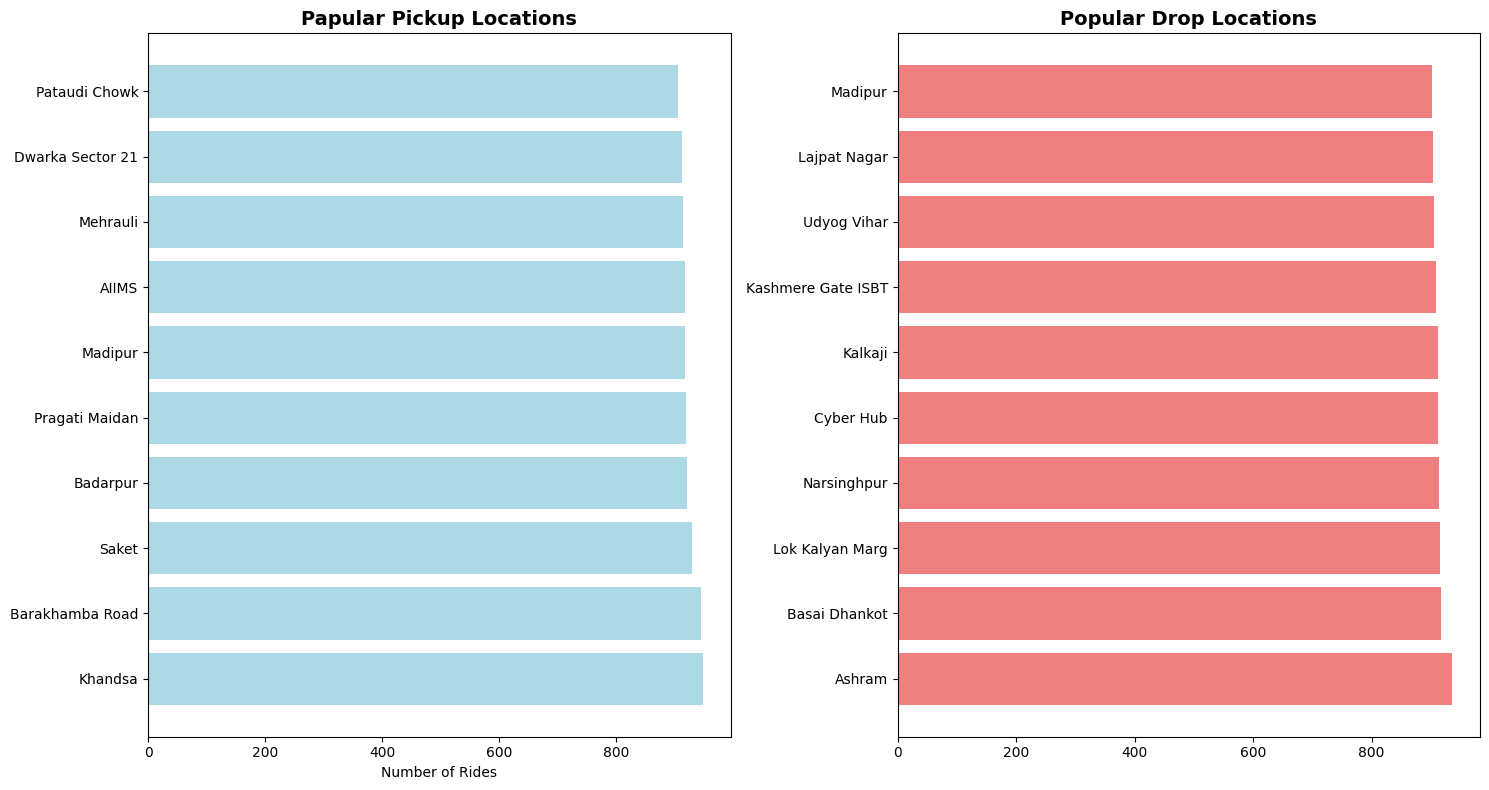

In [26]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
pickup_top10 = df['Pickup Location'].value_counts().head(10)
plt.barh(range(len(pickup_top10)), pickup_top10.values, color = 'lightblue')
plt.yticks(range(len(pickup_top10)), pickup_top10.index)
plt.title('Papular Pickup Locations', fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of Rides')

plt.subplot(1, 2, 2)
drop_top10 = df['Drop Location'].value_counts().head(10)
plt.barh(range(len(drop_top10)), drop_top10.values, color = 'lightcoral')
plt.yticks(range(len(drop_top10)), drop_top10.index)
plt.title('Popular Drop Locations', fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show()

In [31]:
profitable_vehicle = completed_rides.groupby('Vehicle Type')['Booking Value'].sum().idxmax()
print(f"Profitable Vehicle: {profitable_vehicle}")


Profitable Vehicle: Auto
